#### Lab 01 - Content Based Recommendation System

Maintain User Engagement by Generating Recommendation Using Film Genre

#### What Will We Perform ?

We'll Feature Engineer the Genre Column

Perform Term Frequency Inverse Document Frequency Vectorizer on Genre

Perform Cosine Similarity on Our Vectorizer

Create Model to Perform Recommender

In [ ]:
import pandas, warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

In [ ]:
opentable = lambda url, **kwargs : pandas.read_table(url, sep=',', **kwargs)

movies = opentable("movies.csv")

movies.iloc[:5]

,MovieID,Title,Genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies.tail()

,MovieID,Title,Genre
9703,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9704,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9705,193585,Flint (2017),Drama
9706,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9707,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [ ]:
null = movies.isnull().sum()

null.sum()

np.int64(0)

In [ ]:
shapes = movies.shape

shapes[0]

9708

In [ ]:
total_film = movies.iloc[:, 1].nunique()

shapes[0] == total_film

False

In [ ]:
double = movies[movies.iloc[:, 1].duplicated()].iloc[:, 1].values

movies[movies.iloc[:, 1].isin(double)]

,MovieID,Title,Genre
650,838,Emma (1996),Comedy|Drama|Romance
2141,2851,Saturn 3 (1980),Adventure|SciFi|Thriller
4169,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller
5601,26958,Emma (1996),Romance
5854,32600,Eros (2004),Drama
5931,34048,War of the Worlds (2005),Action|Adventure|SciFi|Thriller
6932,64997,War of the Worlds (2005),Action|SciFi
9096,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
9125,147002,Eros (2004),Drama|Romance
9447,168358,Saturn 3 (1980),SciFi|Thriller


In [ ]:
spliter = lambda val : " ".join(val.split("|"))

movies.iloc[:, 2] = movies.iloc[:, 2].apply(spliter)

movies.iloc[:5]

,MovieID,Title,Genre
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies[movies.iloc[:, 1].isin(double)]

,MovieID,Title,Genre
650,838,Emma (1996),Comedy Drama Romance
2141,2851,Saturn 3 (1980),Adventure SciFi Thriller
4169,6003,Confessions of a Dangerous Mind (2002),Comedy Crime Drama Thriller
5601,26958,Emma (1996),Romance
5854,32600,Eros (2004),Drama
5931,34048,War of the Worlds (2005),Action Adventure SciFi Thriller
6932,64997,War of the Worlds (2005),Action SciFi
9096,144606,Confessions of a Dangerous Mind (2002),Comedy Crime Drama Romance Thriller
9125,147002,Eros (2004),Drama Romance
9447,168358,Saturn 3 (1980),SciFi Thriller


In [ ]:
movies["Total"] = movies.iloc[:, 2].apply(lambda val : len(val.split()))

movies = movies.sort_values(["Title", "Total"], ascending=[True, False])

movies.iloc[:5]

,MovieID,Title,Genre,Total
8599,117867,'71 (2014),Action Drama Thriller War,4
8014,97757,'Hellboy': The Seeds of Creation (2004),Action Adventure Comedy Documentary Fantasy,5
5528,26564,'Round Midnight (1986),Drama Musical,2
5690,27751,'Salem's Lot (2004),Drama Horror Mystery Thriller,4
614,779,'Til There Was You (1997),Drama Romance,2


In [ ]:
movies = movies.drop_duplicates(subset="Title", keep="first")

movies[movies.iloc[:, 1].isin(double)]

,MovieID,Title,Genre,Total
9096,144606,Confessions of a Dangerous Mind (2002),Comedy Crime Drama Romance Thriller,5
650,838,Emma (1996),Comedy Drama Romance,3
9125,147002,Eros (2004),Drama Romance,2
2141,2851,Saturn 3 (1980),Adventure SciFi Thriller,3
5931,34048,War of the Worlds (2005),Action Adventure SciFi Thriller,4


In [ ]:
movies = movies.sort_values("MovieID", ascending=True).drop("Total", axis='columns')

movies.iloc[:5]

,MovieID,Title,Genre
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
shapes = movies.shape

total_film = movies.iloc[:, 1].nunique()

assert shapes[0] == total_film, "Fail !"

In [ ]:
movies["Genre"].str.split(" ").explode().nunique()

19

In [ ]:
details = movies['Genre'].str.split(" ").explode().value_counts().to_frame()

details = details.reset_index()

details.columns = ['Genre', 'Total']

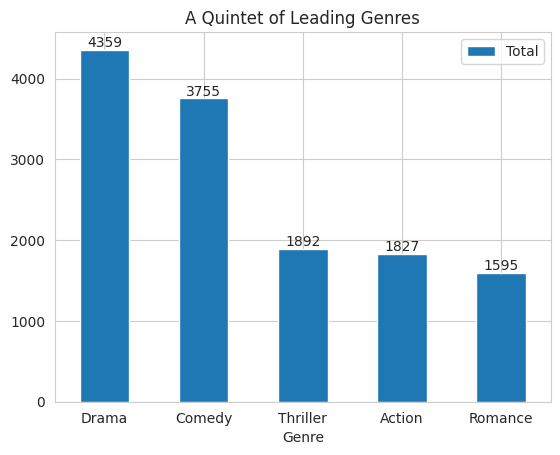

In [ ]:
import seaborn as sns; sns.set_style('whitegrid')

title = "A Quintet of Leading Genres"

plot = details.iloc[:5].set_index('Genre').plot.bar(rot = 0, title = title)

plot.bar_label(plot.containers[0]);

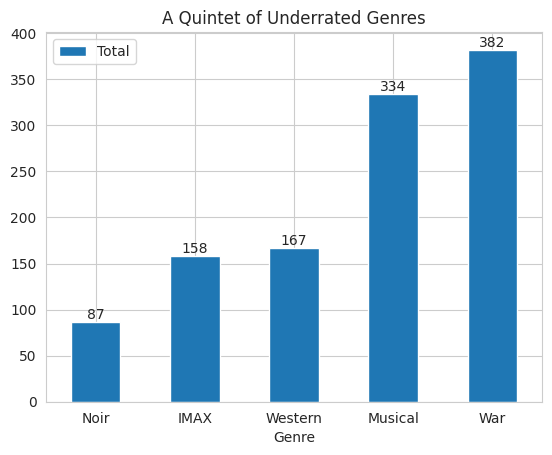

In [ ]:
title = "A Quintet of Underrated Genres"

upside = details.sort_values(by=details.columns[1], ascending=True).iloc[:5]

plot = upside.set_index('Genre').plot.bar(rot = 0, title = title)

plot.bar_label(plot.containers[0]);

In [ ]:
movies.iloc[:5]

,MovieID,Title,Genre
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

metrics = tfidf.fit_transform(movies["Genre"])

metrics.shape

(9703, 19)

In [ ]:
metrics.todense()[0]

matrix([[0.        , 0.41679332, 0.51629181, 0.50489821, 0.26739237,
         0.        , 0.        , 0.        , 0.48301679, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        ]])

In [ ]:
metrics.todense()[1]

matrix([[0.        , 0.51228317, 0.        , 0.62057343, 0.        ,
         0.        , 0.        , 0.        , 0.59367884, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        ]])

In [ ]:
movies.loc[:1]

,MovieID,Title,Genre
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity(metrics)

similarities.shape

(9703, 9703)

In [ ]:
intler = lambda i : movies.iloc[i, 1]

titint = lambda t : movies[movies["Title"] == t].index.values[0]

In [ ]:
title = "Jumanji (1995)"

similar = enumerate(similarities[int(titint(title))])

orilist = list(similar)

In [ ]:
orilist = sorted(orilist, key=lambda i : i[1], reverse=True)

[(i, int(round(t, 3))) for i, t in orilist[:5]]

[(1, 1), (53, 1), (109, 1), (767, 1), (1514, 1)]

In [ ]:
results = [intler(i) for i, _ in orilist[:5]]

movies[movies['Title'].isin(results)]

,MovieID,Title,Genre
1,2,Jumanji (1995),Adventure Children Fantasy
53,60,"Indian in the Cupboard, The (1995)",Adventure Children Fantasy
109,126,"NeverEnding Story III, The (1994)",Adventure Children Fantasy
767,1009,Escape to Witch Mountain (1975),Adventure Children Fantasy
1514,2043,Darby O'Gill and the Little People (1959),Adventure Children Fantasy


In [ ]:
import time

from functools import wraps

def timer(func):

  @wraps(func)

  def wrapper(*args, **kwargs):

    start = time.time()

    result = func(*args, **kwargs)

    selisih = time.time() - start

    return result, selisih

  return wrapper

In [ ]:
@timer

def logits(title, limit):

  indices = int(titint(title))

  target = list(enumerate(similarities[indices]))

  scores = sorted(target, key=lambda x: x[1], reverse=True)

  titles = [i for i in scores if i[0] != indices][:limit]

  result = movies[movies["Title"].isin([intler(i[0]) for i in titles])].copy()

  result["Similarity"] = [round(i[1], 4) for i in titles]

  return result

result, waktu = logits(title, 5)

result

,MovieID,Title,Genre,Similarity
53,60,"Indian in the Cupboard, The (1995)",Adventure Children Fantasy,1.0
109,126,"NeverEnding Story III, The (1994)",Adventure Children Fantasy,1.0
767,1009,Escape to Witch Mountain (1975),Adventure Children Fantasy,1.0
1514,2043,Darby O'Gill and the Little People (1959),Adventure Children Fantasy,1.0
1556,2093,Return to Oz (1985),Adventure Children Fantasy,1.0


In [ ]:
waktu

0.014566421508789062

In [ ]:
result, waktu = logits(title, 100)

waktu

0.05155038833618164

In [ ]:
result[:10]

,MovieID,Title,Genre,Similarity
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1.0
7,8,Tom and Huck (1995),Adventure Children,1.0
53,60,"Indian in the Cupboard, The (1995)",Adventure Children Fantasy,1.0
109,126,"NeverEnding Story III, The (1994)",Adventure Children Fantasy,1.0
119,146,"Amazing Panda Adventure, The (1995)",Adventure Children,1.0
131,158,Casper (1995),Adventure Children,1.0
204,238,Far From Home: The Adventures of Yellow Dog (1...,Adventure Children,1.0
222,258,"Kid in King Arthur's Court, A (1995)",Adventure Children Comedy Fantasy Romance,1.0
671,885,Bogus (1996),Children Drama Fantasy,1.0
701,919,"Wizard of Oz, The (1939)",Adventure Children Fantasy Musical,1.0


In [ ]:
result.tail()

,MovieID,Title,Genre,Similarity
9408,166203,Sapphire Blue (2014),Adventure Children Fantasy SciFi,0.8053
9410,166461,Moana (2016),Adventure Animation Children Comedy Fantasy,0.8047
9516,172793,Vovka in the Kingdom of Far Far Away (1965),Adventure Animation Children Fantasy,0.8047
9536,173873,Gulliver's Travels (1996),Adventure Children Fantasy,0.8047
9663,184987,A Wrinkle in Time (2018),Adventure Children Fantasy SciFi,0.8047
